In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
import Helper as hp #Removing Outliers
import xgboost #XGBoost
from termcolor import colored as cl # text customization
from collections import OrderedDict 

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.ensemble import RandomForestRegressor # RandomForest

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style

In [2]:
# IMPORTING DATA
df = pd.read_csv('Resources/Data/BrooklynHomesPostgres.csv', index_col=0)
df.head(5)

/var/folders/zq/zj22llm50v105v327lqpc9w40000gn/T/ipykernel_32306/458290946.py:2: DtypeWarning: Columns (8,34,36,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Resources/Data/BrooklynHomesPostgres.csv', index_col=0)


,borough,neighborhood,building_class_category,block,lot,building_class,address,apartment_number,zip_code,residential_units,...,BldgFront,BldgDepth,Ext,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,HistDist,Landmark
id,,,,,,,,,,,,,,,,,,,,,
316,3,BOERUM HILL,02 TWO FAMILY HOMES,180,60,S2,525 ATLANTIC AVENUE,NaN,11217,2,...,25.0,79.0,NaN,5685.0,35970.0,0.0,0.0,1905.0,NaN,NaN
389,3,GOWANUS,02 TWO FAMILY HOMES,1015,43,C7,470 4TH AVENUE,5.0,11215,13,...,126.0,120.0,NaN,910350.0,2826386.0,702036.0,2618072.0,2015.0,NaN,NaN
398,3,PARK SLOPE SOUTH,03 THREE FAMILY HOMES,1047,3,C0,555 4 AVENUE,NaN,11215,3,...,0.0,0.0,NaN,106200.0,106200.0,0.0,0.0,0.0,NaN,NaN
469,3,GREENPOINT,02 TWO FAMILY HOMES,2505,3,S2,1050 MANHATTAN AVENUE,NaN,11222,2,...,25.0,40.0,NaN,9606.0,36504.0,0.0,0.0,1931.0,NaN,NaN
576,3,COBBLE HILL,01 ONE FAMILY HOMES,286,41,A9,177 PACIFIC STREET,NaN,11201,1,...,25.0,100.0,NaN,35923.0,101124.0,0.0,0.0,1931.0,Cobble Hill Historic District,NaN


In [3]:
# EDA
clean_df = df[['block','zip_code','gross_sqft','year_built','sale_price','SchoolDist', 'year_of_sale','NumFloors','Council','GarageArea','StrgeArea','UnitsTotal']]
clean_df = clean_df.dropna()
clean_df = hp.remove_outliers(clean_df, 'sale_price', threshold=3)
clean_df.head(5)

,block,zip_code,gross_sqft,year_built,sale_price,SchoolDist,year_of_sale,NumFloors,Council,GarageArea,StrgeArea,UnitsTotal
id,,,,,,,,,,,,
6459,220,11201,2760,1899,2600000,13.0,2011,4.0,33.0,0.0,0.0,1.0
6464,325,11231,2320,1901,2600000,15.0,2012,3.0,39.0,0.0,0.0,2.0
6466,2121,11238,3780,1910,2600000,13.0,2012,3.0,35.0,0.0,0.0,2.0
6468,1074,11215,4160,1899,2600000,15.0,2012,3.0,39.0,0.0,0.0,2.0
6469,1083,11215,3282,1899,2600000,15.0,2012,3.0,39.0,0.0,0.0,2.0


In [4]:
# Describing cleaned dataframe
clean_df.describe()

,block,zip_code,gross_sqft,year_built,sale_price,SchoolDist,year_of_sale,NumFloors,Council,GarageArea,StrgeArea,UnitsTotal
count,76300.000000,76300.000000,76300.000000,76300.000000,7.630000e+04,76300.000000,76300.000000,76300.000000,76300.000000,76300.000000,76300.000000,76300.000000
mean,4916.450105,11220.583447,2348.729135,1924.535033,6.649055e+05,19.604377,2010.960629,2.221779,41.628178,0.934089,0.756802,2.008676
std,2493.298162,42.169513,1117.274475,90.554202,4.029792e+05,3.923560,4.335099,0.739401,4.360442,62.747911,70.104574,1.554913
min,34.000000,0.000000,0.000000,0.000000,1.450000e+05,13.000000,2003.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,2701.000000,11210.000000,1656.000000,1910.000000,3.950000e+05,17.000000,2008.000000,2.000000,37.000000,0.000000,0.000000,1.000000
50%,5231.000000,11221.000000,2208.000000,1925.000000,5.700000e+05,20.000000,2012.000000,2.000000,42.000000,0.000000,0.000000,2.000000
75%,7090.000000,11232.000000,2910.000000,1935.000000,8.100000e+05,22.000000,2015.000000,2.500000,46.000000,0.000000,0.000000,2.000000
max,8955.000000,11416.000000,76422.000000,2017.000000,2.600000e+06,32.000000,2017.000000,119.000000,48.000000,8852.000000,17084.000000,213.000000


In [5]:
# Checking Types
clean_df.dtypes

block             int64
zip_code          int64
gross_sqft        int64
year_built        int64
sale_price        int64
SchoolDist      float64
year_of_sale      int64
NumFloors       float64
Council         float64
GarageArea      float64
StrgeArea       float64
UnitsTotal      float64
dtype: object

In [6]:
# Changing datatypes to int64 for Linear Regression Models
clean_df['SchoolDist'] = pd.to_numeric(clean_df['SchoolDist'], errors = 'coerce')
clean_df['SchoolDist'] = clean_df['SchoolDist'].astype('int64')
clean_df['NumFloors'] = pd.to_numeric(clean_df['NumFloors'], errors = 'coerce')
clean_df['NumFloors'] = clean_df['NumFloors'].astype('int64')
clean_df['Council'] = pd.to_numeric(clean_df['Council'], errors = 'coerce')
clean_df['Council'] = clean_df['Council'].astype('int64')
clean_df['GarageArea'] = pd.to_numeric(clean_df['GarageArea'], errors = 'coerce')
clean_df['GarageArea'] = clean_df['GarageArea'].astype('int64')
clean_df['StrgeArea'] = pd.to_numeric(clean_df['StrgeArea'], errors = 'coerce')
clean_df['StrgeArea'] = clean_df['StrgeArea'].astype('int64')
clean_df['UnitsTotal'] = pd.to_numeric(clean_df['UnitsTotal'], errors = 'coerce')
clean_df['UnitsTotal'] = clean_df['UnitsTotal'].astype('int64')
clean_df.dtypes

block           int64
zip_code        int64
gross_sqft      int64
year_built      int64
sale_price      int64
SchoolDist      int64
year_of_sale    int64
NumFloors       int64
Council         int64
GarageArea      int64
StrgeArea       int64
UnitsTotal      int64
dtype: object

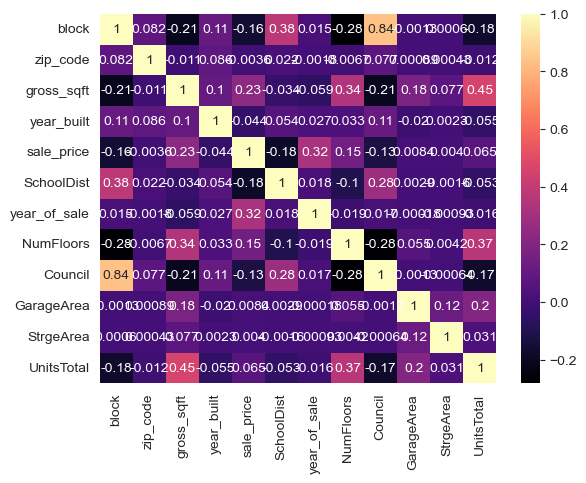

In [7]:
# Correlation Matrix
sb.heatmap(clean_df.corr(), annot = True, cmap = 'magma')
plt.savefig('Resources/Images/heatmap.png')
plt.show()

/var/folders/zq/zj22llm50v105v327lqpc9w40000gn/T/ipykernel_32306/1532405772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(clean_df['sale_price'], color = 'r')


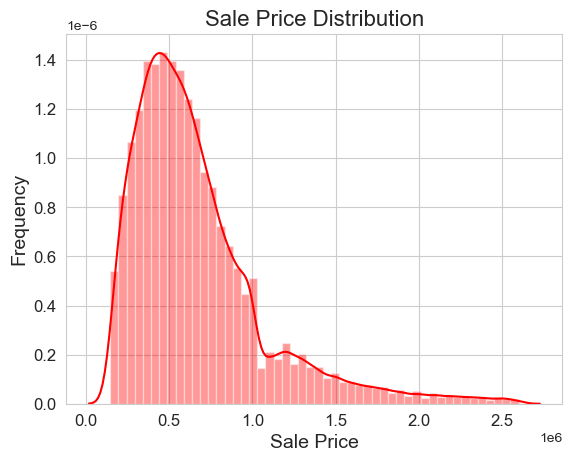

In [8]:
# Distribution plot
sb.distplot(clean_df['sale_price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('Resources/Images/distplot.png')
plt.show()

In [9]:
# FEATURE SELECTION & DATA SPLIT

X = clean_df[['block','zip_code','gross_sqft','year_built','SchoolDist','year_of_sale','NumFloors','Council','GarageArea','StrgeArea','UnitsTotal']].values
y = clean_df['sale_price'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=42)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[ 4795 11203  1416  1925    17  2007     2    41     0     0     1]
 [ 1835 11216  3240  1905    13  2014     3    36     0     0     3]
 [ 1150 11217  2536  1931    13  2016     3    35     0     0     2]
 [ 1820 11221  2100  1910    13  2003     2    36     0     0     1]
 [ 2651 11222  1312  1915    14  2008     1    33     0     0     1]]
X_test samples :  [[ 2331 11211  2220  1899    14  2013     4    33     0     0     1]
 [ 1646 11221  2532  1899    16  2009     2    36     0     0     2]
 [ 1808 11216  6080  1899    13  2003     3    36     0     0     3]
 [ 4681 11203  2510  1940    18  2003     2    41     0     0     3]
 [ 5621 11219  5000  1931    15  2007     3    44     0     0     3]]
y_train samples :  [ 700000  900000 2400000  339000  700000]
y_test samples :  [1265000  330000  325000  334927  790000]


In [10]:
y.shape

(76300,)

In [11]:
# MODELING

# 1. OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [12]:
# 6. Random Forest
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
rf_yhat = rf.predict(X_test)
rf.score(X_test, y_test)

0.5944321835703588

In [13]:
# 7. Initial XGBoost
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb.fit(X_train,y_train)
xgb_yhat = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.6176223821251434

In [14]:
# Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of RandomForest is {}'.format(evs(y_test, rf_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of XGBoost is {}'.format(evs(y_test, xgb_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.2135987452376532
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.21359868985030173
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.21359874339331608
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.2135479041816013
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.21356667931891482
-------------------------------------------------------------------------------
Explained Variance Score of RandomForest is 0.5944953768881018
-------------------------------------------------------------------------------
Explained Variance Score of XGBoost is

In [15]:
# R-Squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of RandomForest is {}'.format(evs(y_test, rf_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of XGBoost is {}'.format(evs(y_test, xgb_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.2135954516194024
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.21359539619378654
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.21359544977340528
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.21354457631955792
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.2135633639061736
-------------------------------------------------------------------------------
R-Squared of RandomForest is 0.5944953768881018
-------------------------------------------------------------------------------
R-Squared of XGBoost is 0.6176477806987686
-------------------------------------------------------------------------------
